#### Candidata: Aline Rodrigheri Ioste

# Descrição do Problema: 
Construção de um classificador de produtos que recebe um conjunto de características de um produto e retorna a categoria dele.


# Parte 1 - Análise Exploratória

O dataset disponivel para a solução do problema é composto de uma amostragem de dados da plataforma do Elo7. O Elo7 é o maior site brasileiro de compra e venda de artesanato. Através da plataforma online compradores podem compra diretamente de milhares de pessoas que transformam ideias criativas em produtos únicos e diferenciados. o dataset disponivel contém 38.507 registros distribuídos em 5 categorias (Bebê, Bijuterias e Jóias, Decoração, Lembrancinhas, Papel e Cia e Outros). Estes registros foram gerados através de cada clique em um produto a partir de um termo de busca do usuário no site.

## 1 : Anaĺise dos campos que podem ser considerados classificatórios para a identificação do produto

Para construir um modelo classificador de produtos a partir de suas características precisamos analisar se existem campos disponiveis no dataset que são determinantes para a identificação da categoria dos produtos.

Intuitivamente baseado no nosso conhecimento do negocio e fazendo uma analogia dos campos que usamos para identificar os produtos podemos avaliar os campos que seriam determinantes para identificar a categoria dos produtos.

Uma análise intuitiva dos campos disponivel no dataset podemos avaliar item a item do dataset, como uma visão prévia dos possiveis candidatos.


In [58]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

dataset=pd.read_csv("data/elo7_recruitment_dataset.csv")

In [59]:
dataset.head(5)

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração


In [60]:
dataset['category'].value_counts().head()

Lembrancinhas    17759
Decoração         8846
Bebê              7026
Papel e Cia       2777
Outros            1148
Name: category, dtype: int64

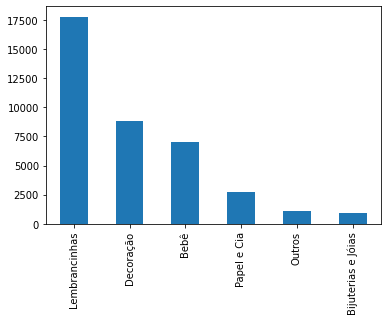

In [61]:
dataset['category'].value_counts().plot(kind = 'bar')
plt.show()

Os dados mais buscados no site tem a distribuição de:
Lembrancinhas:46,12% ;Decoração:22,97%; Bebê:18,24%; Papel e Cia:7,21% e Outros:2,98%


In [62]:
dataset.head()

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração


Analisando a base de dados através do conhecimento de negócio os itens relevantes para a determinação do produto são dados de textos livres, não estruturados como o campo "query" que é o termo de busca inserido pelo usuário, o campo "title", que é o título do produto, e a "concatenated_tags", que são as tags do produto inseridas pelo vendedor. Temos o preço (price) e o tamanho (weight) que devem ser avaliados se existisse alguma correlação forte entre eles com a categoria.

## 2 : Matriz de Correlação de Pearson

Como provas matematicamente da baixa correlação entre os campos podemos criar uma matriz de correlação para demonstrar as correlações entre os campos. Através da matriz de correlação podemos ter uma visão dos valores de correlação de Pearson entre todos os campos disponiveis no dataset. Desta forma teremos o embasamento matemático da hipotese da análise dos campos de maior relevância para a identificação da classificação do produto. A avaliação dos campos através da matriz de correlação que medirá o grau de relação linear entre cada par de itens disponivel no dataset. Os valores de correlação da matriz são compostos por uma variação entre -1 e +1. Matematicamente a matriz de correlação avaliará a força e a direção da relação entre duas caracteristica, sendo consideradas variáveis altamente correlacionados as que variavies que obterem valores de correlação maiores do que 0,7 tanto positivos como negativos.

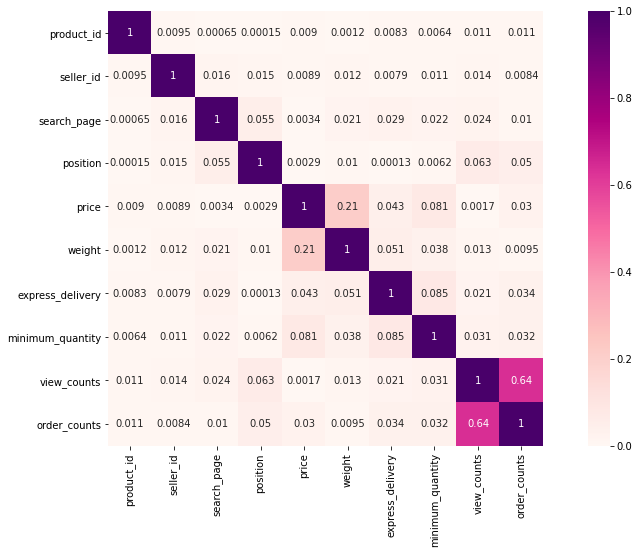

In [63]:
corrmat = abs(dataset.corr())

f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(abs(dataset.corr()),
             vmin = 0.0,
            square=True, annot=True, vmax=1.0, cmap='RdPu')

Na Matriz de correlação podemos notar que os campos 'product_id' , 'seller_id', 'search_page', 'position','creation_date', 'express_delivery', 'minimum_quantity', 'view_counts', 'order_counts', possuem correlações insignificantes entre eles, sendo encontrado somente uma correlação de 0.6 entre os campos view_counts e order_counts, porém este valores não representam nenhuma correlação com a categorização do produto.

## 3 - Exclução dos campos que não são fatores determinantes para categorização dos produtos

Podemos excluir os campos do dataset que evidenciamos matematicamente que não possuem correlação. Sendo os campos que não tem correlação matemática com a categorização dos produtos

In [64]:
#ID do produto não é um fator determinando para classificação
dataset = dataset.drop(['product_id'],axis=1) 

# Um vendedor pode trabalhar com vários produtos então não é um fator determinando para classificação
dataset = dataset.drop(['seller_id'],axis=1) 

#número de páginas que apareceu não é um fator determinando para classificação
dataset = dataset.drop(['search_page'],axis=1) 

#Posição do produto não é um fator determinando para classificação
dataset = dataset.drop(['position'],axis=1) 

#Data de criação do produto na plataforma do Elo7 não é um fator determinando para classificação
dataset = dataset.drop(['creation_date'],axis=1) 

#Se o produto é pronta entrega ou não, não é um fator determinando para classificação
dataset = dataset.drop(['express_delivery'],axis=1) 

#Quantidade de unidades mínima necessária para compra não é um fator determinando para classificação.
dataset = dataset.drop(['minimum_quantity'],axis=1)

#Número de cliques no produto nos últimos três meses não é um fator determinando para classificação
dataset = dataset.drop(['view_counts'],axis=1)

#Número de vezes que o produto foi comprado nos últimos três meses não é um fator determinando para classificação
dataset = dataset.drop(['order_counts'],axis=1)

In [65]:
dataset.head(10)

,query,title,concatenated_tags,price,weight,category
0,espirito santo,Mandala Espírito Santo,mandala mdf,171.890000,1200.0,Decoração
1,cartao de visita,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,77.670000,8.0,Papel e Cia
2,expositor de esmaltes,Organizador expositor p/ 70 esmaltes,expositor,73.920006,2709.0,Outros
3,medidas lencol para berco americano,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,118.770004,0.0,Bebê
4,adesivo box banheiro,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,191.810000,507.0,Decoração
5,dia dos pais,Álbum de figurinhas dia dos pais,albuns figurinhas pai lucas album fotos,49.970000,208.0,Lembrancinhas
6,arranjo de flores para mesa,Arranjo de Flores - Orquidias,mini arranjos,23.670000,207.0,Decoração
7,lembrancinha maternidade,Kit Aromarizador + sacola / Lembrancinha Mater...,bb lembrancinhas maternidade baby lembranca ma...,12.710000,55.0,Lembrancinhas
8,chaveiro dia dos pais,chaveiro dia dos pais,dia pais,11.420000,6.0,Lembrancinhas
9,manta personalizada,Manta para bebê personalizada de Nuvem com nome,nascimento manta baby cha bebe vestido bebe,107.100000,9.0,Bebê


Para facilitar a classificação vamos transformar as categorias em valores numéricos 

In [66]:
category = {'Bebê': '1',
         'Bijuterias e Jóias': '2',
         'Decoração': '3',
         'Lembrancinhas': '4',
         'Papel e Cia': '5',
         'Outros': '6'}
         
dataset = dataset.replace(category)

In [68]:
dataset.head(5)

,query,title,concatenated_tags,price,weight,category
0,espirito santo,Mandala Espírito Santo,mandala mdf,171.890000,1200.0,3
1,cartao de visita,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,77.670000,8.0,5
2,expositor de esmaltes,Organizador expositor p/ 70 esmaltes,expositor,73.920006,2709.0,6
3,medidas lencol para berco americano,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,118.770004,0.0,1
4,adesivo box banheiro,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,191.810000,507.0,3


Medindo a correlação de pearson da categoria com os campos "price" and "weight" podemos avaliar se possuem correlação com a categoria.

Vamos então medir a correlação de pearson da categoria com os campos "price" and "weight".

In [71]:
import scipy
from scipy import stats

X = (dataset['weight'].values)
Y = (dataset['category'].values)
X = X .astype(int)
Y = Y.astype(int)
pearson, x = scipy.stats.stats.pearsonr(X, Y)
print(pearson)

-0.01720542600855266


In [72]:
import scipy
from scipy import stats

X = (dataset['price'].values)
Y = (dataset['category'].values)
X = X .astype(int)
Y = Y.astype(int)
pearson, x = scipy.stats.stats.pearsonr(X, Y)
print(pearson)

-0.2196037673737705


que também não existem correlações suficientes, tendo o tamanho uma correlação da categoria de -0.017 e com o preço de -0.219, ou seja estes campos também não contrubiem para a identificação do produto podendo ser excluidos do dataset.

In [73]:
#Número de cliques no produto nos últimos três meses não é um fator determinando para classificação
dataset = dataset.drop(['price'],axis=1)

#Número de vezes que o produto foi comprado nos últimos três meses não é um fator determinando para classificação
dataset = dataset.drop(['weight'],axis=1)

Dos 15 itens disponivel no dataset 11 deles não apresentaram correlação suficiente para a identificação da categoria do produto, sendo 3 itens de preenchimento de texto livre não estruturado usados pelo usuário para a categorização do produto, como titulo do produto, query de busca do produto e as tags para a busca do produto. Entretando estes campos são campos não estruturados, impossibilitando a construção de modelos por meio de tecnicas que necessitam de analisar caracteristicas estruturadas.

Para a solução do problema baseado nos campos de valores não estruturados precisaremos criar um modelo que seja capaz de aprender baseado em textos livres, baseados na análise dos campos como titulo, query e tags.

O modelo teria que fazer um minetismo da forma humana de classificar os produtos através de textos não estruturados.

# Parte 2 - Sistema de Classificação de Produtos

Note que os fatores determinantes para a classifação dos produtos são os campos com texto livres.
Baseado nas 6 possiveis categorias humanamente podemos classificar com alta precisão a categoria do produto, apenas lendo os campos como query, title ou concatenarted_tags.
O ideal seria que nosso modelo pudesse fazer o mesmo, pois as outras caracteristicas não são relevantes para a classificação do produto, conforme demonstrado na análise exploratória dos dados. 

In [74]:
dataset.head(10)

,query,title,concatenated_tags,category
0,espirito santo,Mandala Espírito Santo,mandala mdf,3
1,cartao de visita,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,5
2,expositor de esmaltes,Organizador expositor p/ 70 esmaltes,expositor,6
3,medidas lencol para berco americano,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,1
4,adesivo box banheiro,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,3
5,dia dos pais,Álbum de figurinhas dia dos pais,albuns figurinhas pai lucas album fotos,4
6,arranjo de flores para mesa,Arranjo de Flores - Orquidias,mini arranjos,3
7,lembrancinha maternidade,Kit Aromarizador + sacola / Lembrancinha Mater...,bb lembrancinhas maternidade baby lembranca ma...,4
8,chaveiro dia dos pais,chaveiro dia dos pais,dia pais,4
9,manta personalizada,Manta para bebê personalizada de Nuvem com nome,nascimento manta baby cha bebe vestido bebe,1


Temos então 3 fortes candidados como query - termo de busca inserido pelo usuário, title - título do produto e a 
concatenated_tags - tags do produto inseridas pelo vendedor.
Podemos por pensamento empirico determinar que estes são os fatores determinantes para classificação do produto, pois são os fatores que os usuários do site usam para buscar os produtos, ou seja através destes itens de buscam podemos facilmente classificar o produto corretamente.
O desafio aqui então é criar um modelo que possa usar os mesmos fatores para determinar a classificação o produto.
Para fazer um minetismo deste forma de classificação dos usuários do site, vamos usar os dados não estruturados para determinar a classificação dos produtos.

### Análise do tamanho do Corpus

In [75]:
words = list(set(dataset["title"].values))
num_words = len(words)
print(f"Total de palavras unicas no titulo: {num_words}")

words = list(set(dataset["concatenated_tags"].values))
num_words = len(words)
print(f"Total de palavras unicas nas tags: {num_words}")

words = list(set(dataset["query"].values))
num_words = len(words)
print(f"Total de palavras unicas no Query: {num_words}")

Total de palavras unicas no titulo: 25355
Total de palavras unicas nas tags: 23011
Total de palavras unicas no Query: 6397


Note que o corpus que temos de palavras no titulo e nas tags estão muito proximas, estão entre +- 23 mil a +-25 mil. 
Este seria o nosso tamanho do corpus, ou sejam quantidade de palavras unicas usados para determinar a classificação dos produtos.
Através destas palavras um ser humano é capaz de classificar o produto. 
Olhando o corpus o campos usado para a busca este corpus reduz para +- 6 mil palavras. 
Precisamos então avaliar qual seria o campos com maior indice de precisão para classificação de produto, um campos com maior quantidade de palavras unicas ou um campo com menor quantidade de palavras.



### Tokenizer
Para que um modelo possa analisar estes dados precisamos transformar estes dados para valores numéricos.
Um valor numérico será atribuído a um número de n-grams por sequência. Vamos precisar usar uma função de tokenização.
O Tokenizer disponivel na biblioteca do keras, esta função vai determina um index para cada palavra presente no corpus.


Vamos começar então pela análise do campo Titulo que temos um corpus de 25355

Para que o modelo possa analisar estes dados é necessário formata-los de modo que todas as sequências tenham o mesmo tamanho, que no caso do texto podemos analisar que tem tamanhos distintos.
Então para isso precisamos utilizar a função pad_sequences, ela também é o keras, e será responsável por truncar as sequências maiores e completar as sequências menores com zeros.

Podemos então criar uma função generica para testar nosso modelo com as três variaveis, title, query ou concatenated_tags.
Desta forma podemos testar qual delas terá a maior precisão para classificação dos produtos.
Como os campos são textos livres não estruturados, um deles terá a melhor classificação que deve ser analisada pelo modelo.

In [76]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [77]:
max_features_title = 25355
max_features_query = 6397
data = dataset

max_fatures = max_features_title
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['title'].values)
X = tokenizer.texts_to_sequences(data['title'].values)
X = pad_sequences(X)
Y = pd.get_dummies(data['category']).values


X_title, Y_title = X , Y


max_fatures = max_features_query
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['query'].values)
X = tokenizer.texts_to_sequences(data['query'].values)
X = pad_sequences(X)
Y = pd.get_dummies(data['category']).values


X_query, Y_query = X , Y




In [78]:
print(X_title.shape,Y_title.shape)
print(X_query.shape,Y_query.shape)

(38507, 14) (38507, 6)
(38507, 15) (38507, 6)


## Dataset de Treinamento e Validação

Tendo os conjunto de dados pre processados de forma que um modelo de máquina possa interpretá-los. 
Vamos então separar os dados entre dados de treinamento e de validação para avaliar a precisão do nossos modelos.
Vamos então dividir os dados entre 80% para treinamento e 20% para validação do modelo.


In [79]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

### Dataset de classificação pelo titulo

In [80]:
(X_train_title, X_test_title,
 Y_train_title, Y_test_title) = train_test_split(X_title, Y_title, test_size = 0.20, random_state = 42)

In [81]:
print(Y_train_title.shape)
print(Y_test_title.shape)

(30805, 6)
(7702, 6)


### Dataset de classificação pela query

In [82]:
(X_train_query, X_test_query,
 Y_train_query, Y_test_query) = train_test_split(X_query, Y_query, test_size = 0.20, random_state = 42)

In [83]:
print(Y_train_query.shape)
print(Y_test_query.shape)

(30805, 6)
(7702, 6)


Temos então 30.805 registros para treinamento do modelo e 7.702 registro para a validação do modelo.

### Técnica escolhida para desenvolvimento do modelo

Vamos criar um modelo usando tecnicas mais avançadas de treinamento de máquina, usando aprendizado produndo. 
Deep Learning com redes neurais recorrentes para a classificação dos produtos usando dados não estruturados.


O nosso objetivo aqui é classificar os dados como os seres humanos, nós não começamos a pensar do zero a cada segundo.
Vamos lendo a cada palavra e com base na compreensão das palavras anteriores, nos não jogamos fora tudo o que estamos lendo e lemos cada palavra com um significado unico, mas  vamos lendo as palavras e formando a interpretação baseada na palavra anterior, ou seja nossos pensamentos tem persistência.

Com modelos tradicionais isso seria impossivel, até mesmo se tratando de redes neurais tradicionais, isso dificulta a aplicação para resolver este problema de classificação de produto baseado em textos não estruturados.

Por exemplo, aqui temos um problema onde para a classificação de produtos a partir da descrição deles temos que não somente usar as palavras mais levar em consideração as palavras anteriores, uma compreensão das frases, assim como um ser humano faria.

Um modelo estatistico ou uma rede neural tradicional não poderia usar o aprendizado.

O objetivo aqui então é usar as Redes neurais recorrentes para resolver esse problema, pois estas redes possuem um aprendizado com loops, e isso permite que o nosso modelo aprenda com informações persistentes, assim como nos seres humanos classificariamos os produtos apenas lendo os textos.

Uma rede neural recorrente são redes de múltiplas cópias da mesma rede, onde cada rede passa uma mensagem a uma rede sucessora, desta forma podemos então criar esta persistencia que precisamos para resolver este problema de classificação de produto baseado nos textos livres dos campos como titulo ou query.

### Redes Neurais Recorrentes

Definindo então a técnica que queremos usar para resolver o problema vamos utilizar a biblioteca keras para produzir uma rede neural que aprenda a classificar os produtos pelos titulos ou query.
Vamos definir as camadas do tipo Embedding, LSTM e Dense.
As camadas Embedding servirá para que a rede aprenda as representações mais relevantes para as camandas posteriores.
As camanda LSTM permitirá que a sequência seja tratada como um conjunto de dados onde o contexto relevante para que o determinado atributo.
As camandas Dense será utilizadas para fazer o processo de transformação da representação produzida pelo LSTM até se atingir a camanda final de 1 neurônio que servirá de camanda de saída.


In [84]:
max_features_title = 25355
max_features_query = 6397

O corpus máximo vai ser conforme as palavras unicas encontradas em cada campo, conforme explorados na análise do corpus dos campos.

O modelo terá camadas de Embedding de 128 e LSTM de 196. 
Teremos um dropout de 0.5 para evitar que a rede decorre o cada, ao invés de aprender.
Como temos 6 categorias teremos uma Dense de 6 neuromios para determinar as 6 possiveis saidas. 

In [85]:
embed_dim = 128
lstm_out = 196

In [86]:
def CreateModel(max_fatures, X):
    model = Sequential()
    model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
    model.add(SpatialDropout1D(0.4))
    model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.5))
    model.add(Dense(6,activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    print(model.summary())
    return model


Model_title= CreateModel(max_features_title,X_train_title )
Model_query= CreateModel(max_features_query,X_train_query )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 14, 128)           3245440   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 14, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1182      
Total params: 3,501,422
Trainable params: 3,501,422
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15, 128)           818816    
_____________________________________________________________

Os dois modelos estão criados tendo uma rede neural recorrente de 1,074,798 para a classificação dos produtos através do campo query e um modelo de 3,501,422 para a classificação dos produtos através do titulo.

Vamos usar 20 epocas para o treinamento dos modelos. 

In [87]:
batch_size = 32
epoch=20

In [88]:
### Treinamento do modelo para a classificação de produto baseado no titulo

In [29]:
Model_title.fit(X_train_title, Y_train_title, epochs = epoch, batch_size=batch_size, verbose = 2)

Epoch 1/20
 - 161s - loss: 0.7215 - acc: 0.7558
Epoch 2/20
 - 157s - loss: 0.4103 - acc: 0.8661
Epoch 3/20
 - 158s - loss: 0.3360 - acc: 0.8884
Epoch 4/20
 - 155s - loss: 0.2942 - acc: 0.8996
Epoch 5/20
 - 154s - loss: 0.2711 - acc: 0.9072
Epoch 6/20
 - 156s - loss: 0.2491 - acc: 0.9127
Epoch 7/20
 - 154s - loss: 0.2349 - acc: 0.9163
Epoch 8/20
 - 156s - loss: 0.2216 - acc: 0.9201
Epoch 9/20
 - 155s - loss: 0.2101 - acc: 0.9248
Epoch 10/20
 - 154s - loss: 0.2054 - acc: 0.9252
Epoch 11/20
 - 160s - loss: 0.1948 - acc: 0.9292
Epoch 12/20
 - 153s - loss: 0.1904 - acc: 0.9314
Epoch 13/20
 - 156s - loss: 0.1843 - acc: 0.9330
Epoch 14/20
 - 153s - loss: 0.1756 - acc: 0.9351
Epoch 15/20
 - 154s - loss: 0.1736 - acc: 0.9364
Epoch 16/20
 - 155s - loss: 0.1676 - acc: 0.9385
Epoch 17/20
 - 156s - loss: 0.1637 - acc: 0.9399
Epoch 18/20
 - 156s - loss: 0.1587 - acc: 0.9422
Epoch 19/20
 - 156s - loss: 0.1564 - acc: 0.9434
Epoch 20/20
 - 157s - loss: 0.1504 - acc: 0.9432


In [30]:
### Treinamento do modelo para a classificação de produto baseado no query

In [31]:
Model_query.fit(X_train_query, Y_train_query, epochs = epoch, batch_size=batch_size, verbose = 2)

Epoch 1/20
 - 113s - loss: 0.8178 - acc: 0.7240
Epoch 2/20
 - 112s - loss: 0.5276 - acc: 0.8306
Epoch 3/20
 - 112s - loss: 0.4742 - acc: 0.8447
Epoch 4/20
 - 109s - loss: 0.4494 - acc: 0.8521
Epoch 5/20
 - 113s - loss: 0.4355 - acc: 0.8520
Epoch 6/20
 - 113s - loss: 0.4224 - acc: 0.8537
Epoch 7/20
 - 107s - loss: 0.4131 - acc: 0.8564
Epoch 8/20
 - 111s - loss: 0.4063 - acc: 0.8592
Epoch 9/20
 - 111s - loss: 0.3969 - acc: 0.8597
Epoch 10/20
 - 112s - loss: 0.3948 - acc: 0.8594
Epoch 11/20
 - 111s - loss: 0.3895 - acc: 0.8606
Epoch 12/20
 - 114s - loss: 0.3860 - acc: 0.8605
Epoch 13/20
 - 111s - loss: 0.3819 - acc: 0.8620
Epoch 14/20
 - 109s - loss: 0.3791 - acc: 0.8633
Epoch 15/20
 - 112s - loss: 0.3762 - acc: 0.8640
Epoch 16/20
 - 112s - loss: 0.3737 - acc: 0.8658
Epoch 17/20
 - 112s - loss: 0.3677 - acc: 0.8647
Epoch 18/20
 - 114s - loss: 0.3671 - acc: 0.8643
Epoch 19/20
 - 111s - loss: 0.3637 - acc: 0.8667
Epoch 20/20
 - 113s - loss: 0.3621 - acc: 0.8677


# Parte 3 - Avaliação do Sistema de Classificação

Para a avaliação dos modelos vamos utilizar as metricas:
    
A acurácia é uma boa indicação geral de como o modelo performou.
A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos.
O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos.
O F1-Score é simplesmente uma maneira de observar somente 1 métrica ao invés de duas (precisão e recall) em alguma situação.


In [32]:
def ClassificyPredict(classifier, X_test,Y_test ):
    # Predizendo os resultados do conjunto de teste
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)
    
    from sklearn.metrics import accuracy_score
    print('Acurácia: %.2f%%' % (accuracy_score(Y_test, y_pred)*100))
    
    from sklearn.metrics import classification_report
    print(classification_report(Y_test, y_pred))

In [33]:
ClassificyPredict(Model_title, X_test_title, Y_test_title)

Acurácia: 88.18%
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1405
           1       0.93      0.94      0.94       171
           2       0.91      0.88      0.90      1776
           3       0.90      0.92      0.91      3573
           4       0.75      0.75      0.75       567
           5       0.78      0.73      0.76       210

   micro avg       0.89      0.88      0.89      7702
   macro avg       0.86      0.85      0.85      7702
weighted avg       0.89      0.88      0.89      7702
 samples avg       0.88      0.88      0.88      7702



/home/aline/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [34]:
ClassificyPredict(Model_query , X_test_query, Y_test_query)

Acurácia: 83.47%
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1405
           1       0.87      0.85      0.86       171
           2       0.86      0.82      0.84      1776
           3       0.85      0.92      0.88      3573
           4       0.79      0.56      0.66       567
           5       0.81      0.49      0.61       210

   micro avg       0.85      0.83      0.84      7702
   macro avg       0.84      0.74      0.78      7702
weighted avg       0.85      0.83      0.84      7702
 samples avg       0.83      0.83      0.83      7702



/home/aline/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


Note que o modelo com a análise do titulo teve uma maior acurácia do que o modelo com análise do query.
Intuitivamenente era esperado devido ao modelo usar um corpus maior para a classificação dos produtos de 25355 para titulos contra 6397 das querys.


Conseguimos obter uma classificação dos produtos de 87.82% de acurácia usando uma rede neural recorrente com analise dos campos textos não estruturados.